In [187]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [189]:
num_employees = 1000
np.random.seed(42) # for reproducibility


In [191]:
data = {
    'EmployeeID': range(1, num_employees + 1),
    'YearsAtCompany': np.random.randint(1, 15, num_employees),
    'SatisfactionScore': np.random.uniform(3.0, 5.0, num_employees).round(1), # Scale of 1-5
    'TrainingHours': np.random.randint(10, 100, num_employees),
    'ProjectsCompleted': np.random.randint(1, 10, num_employees),
    'LastPromotionYears': np.random.randint(0, 5, num_employees),
    'WorkLifeBalance': np.random.randint(1, 5, num_employees), # Scale of 1-5
    'Department': np.random.choice(['Sales', 'HR', 'IT', 'Marketing', 'Finance'], num_employees),
    'Gender': np.random.choice(['Male', 'Female'], num_employees),
}

In [193]:
df = pd.DataFrame(data)


In [195]:
df['PerformanceScore'] = (
    50 +
    df['SatisfactionScore'] * 5 +
    df['ProjectsCompleted'] * 3 +
    df['TrainingHours'] * 0.2 +
    df['YearsAtCompany'] * 1.5 +
    np.random.normal(0, 5, num_employees) # Add some random noise
).clip(0, 100).round(0) # Clip scores between 0 and 100


In [197]:
print("--- Synthetic Data Head ---")
print(df.head())
print("\n--- Synthetic Data Info ---")
df.info()
print("\n--- Synthetic Data Description ---")
print(df.describe())

# --- 2. Exploratory Data Analysis (EDA) & Visualization ---
print("\n--- Starting Exploratory Data Analysis (EDA) ---")


--- Synthetic Data Head ---
   EmployeeID  YearsAtCompany  SatisfactionScore  TrainingHours  \
0           1               7                4.7             30   
1           2               4                4.9             90   
2           3              13                3.3             31   
3           4              11                4.9             57   
4           5               8                4.0             46   

   ProjectsCompleted  LastPromotionYears  WorkLifeBalance Department  Gender  \
0                  6                   2                2         IT    Male   
1                  8                   4                3      Sales  Female   
2                  3                   1                4    Finance    Male   
3                  1                   4                2    Finance  Female   
4                  9                   1                2      Sales    Male   

   PerformanceScore  
0             100.0  
1             100.0  
2             100.0  


Text(0, 0.5, 'Number of Employees')

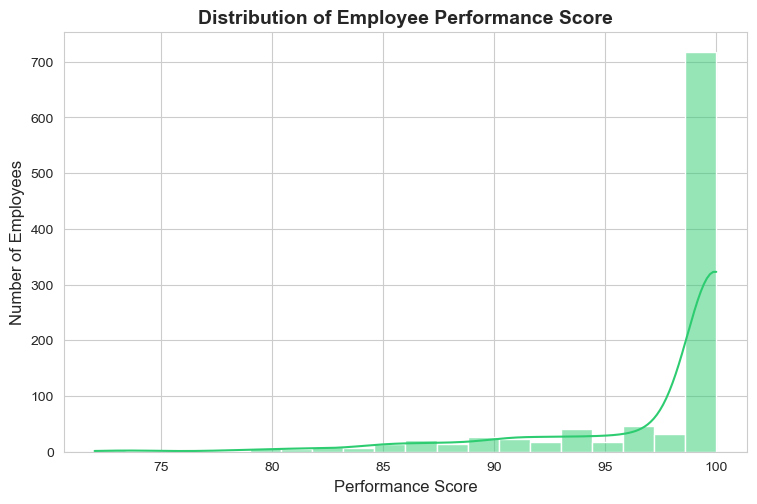

In [199]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 12)) # Adjust figure size for better visualization

# Distribution of Performance Score
plt.subplot(2, 3, 1) # 2 rows, 3 columns, 1st plot
sns.histplot(df['PerformanceScore'], kde=True, bins=20, color='#2ecc71') # A professional green color
plt.title('Distribution of Employee Performance Score', fontsize=14, fontweight='bold')
plt.xlabel('Performance Score', fontsize=12)
plt.ylabel('Number of Employees', fontsize=12)

Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

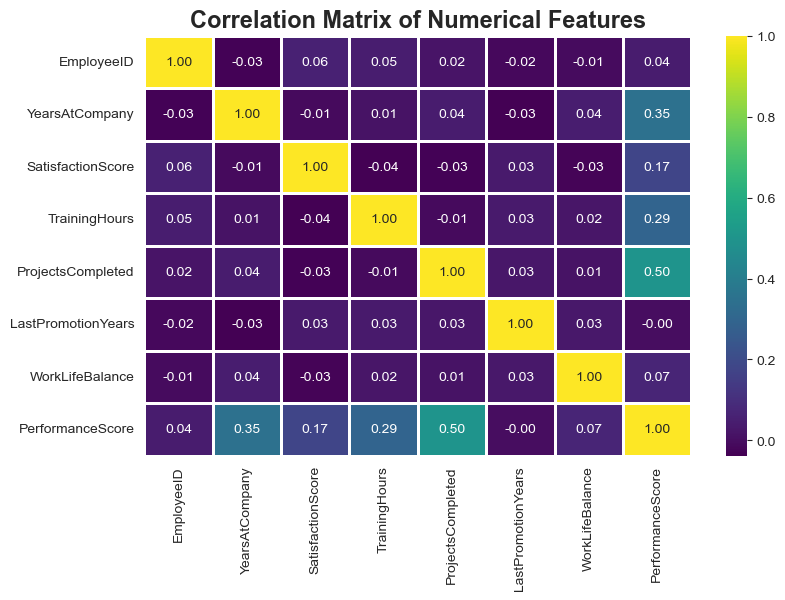

In [201]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 12)) # Adjust figure size for better visualization

# Correlation Matrix Heatmap
# Select only numerical columns for correlation
numerical_df = df.select_dtypes(include=np.number)
plt.subplot(2, 3, 2)
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis', fmt=".2f", linewidths=.8)
plt.title('Correlation Matrix of Numerical Features', fontsize=17, fontweight='bold')


Text(0, 0.5, 'Performance Score')

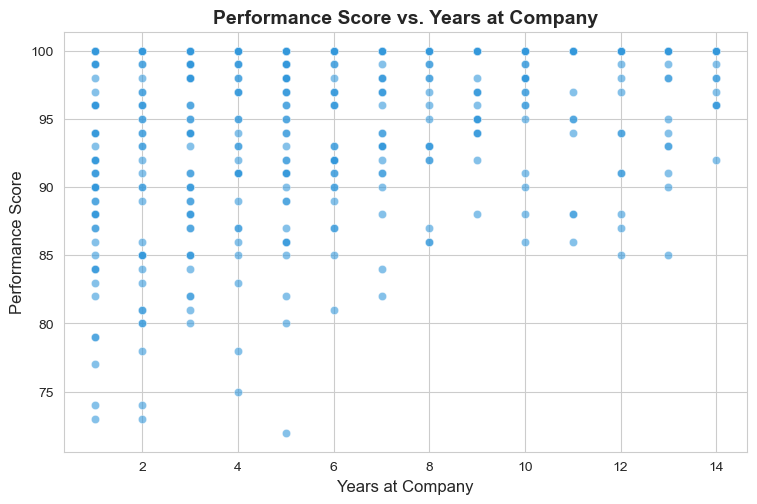

In [203]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 12)) # Adjust figure size for better visualization

# Scatter plot: Years at Company vs. Performance Score
plt.subplot(2, 3, 3)
sns.scatterplot(x='YearsAtCompany', y='PerformanceScore', data=df, alpha=0.6, color='#3498db') # A professional blue color
plt.title('Performance Score vs. Years at Company', fontsize=14, fontweight='bold')
plt.xlabel('Years at Company', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)


Text(0, 0.5, 'Performance Score')

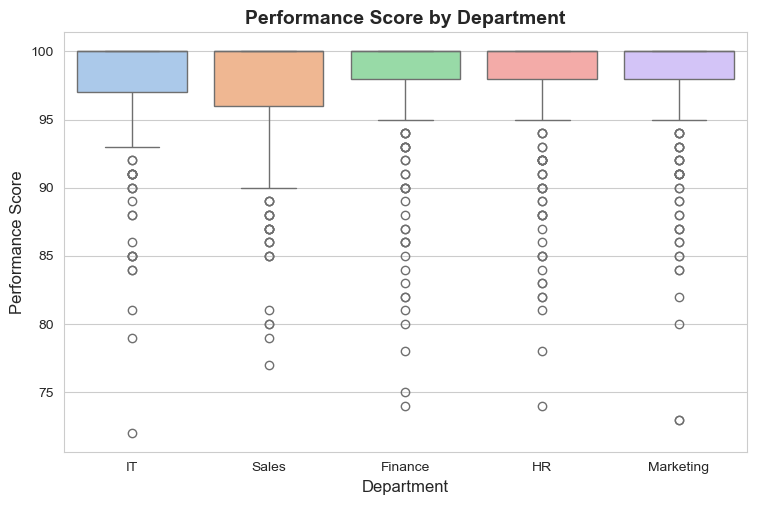

In [205]:
sns.set_style("whitegrid")
plt.figure(figsize=(30, 12)) # Adjust figure size for better visualization

# Box plot: Performance Score by Department
plt.subplot(2, 3, 4)

sns.boxplot(x='Department', y='PerformanceScore', data=df, palette='pastel', hue='Department', legend=False)
plt.title('Performance Score by Department', fontsize=14, fontweight='bold')
plt.xlabel('Department', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)

Text(0, 0.5, 'Performance Score')

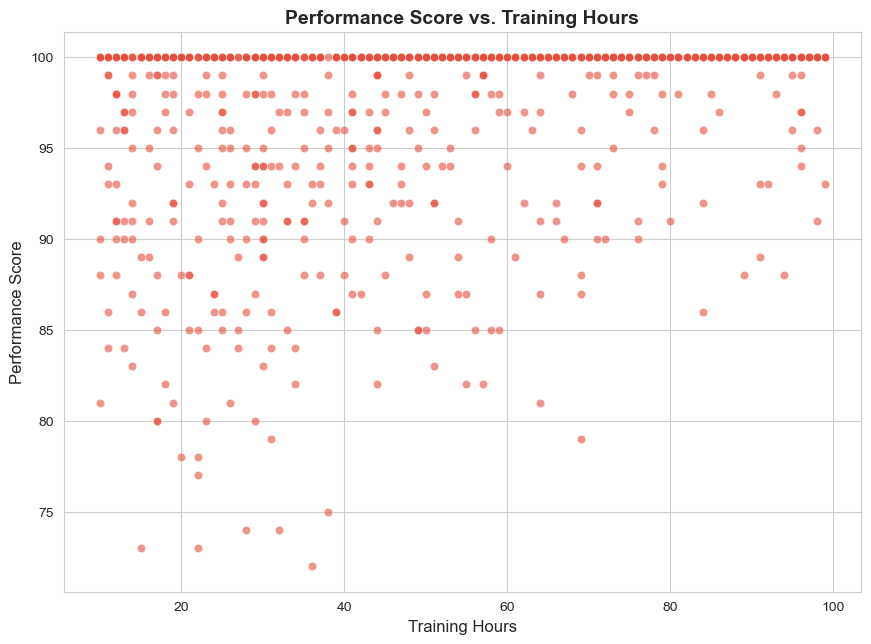

In [207]:
sns.set_style("whitegrid")
plt.figure(figsize=(35, 16)) # Adjust figure size for better visualization

# Scatter plot: Training Hours vs. Performance Score
plt.subplot(2, 3, 5)
sns.scatterplot(x='TrainingHours', y='PerformanceScore', data=df, alpha=0.6, color='#e74c3c') # A professional red color
plt.title('Performance Score vs. Training Hours', fontsize=14, fontweight='bold')
plt.xlabel('Training Hours', fontsize=12)
plt.ylabel('Performance Score', fontsize=12)


In [209]:
print("\n--- EDA Complete ---")


--- EDA Complete ---


In [211]:
# --- 3. Data Preprocessing ---
print("\n--- Starting Data Preprocessing ---")

# Define features (X) and target (y)
# Drop EmployeeID as it's just an identifier, and the target variable itself
X = df.drop(['EmployeeID', 'PerformanceScore'], axis=1)
y = df['PerformanceScore']

# Handle categorical variables using one-hot encoding
X = pd.get_dummies(X, columns=['Department', 'Gender'], drop_first=True)

# Split data into training and testing sets
# We use 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Feature Scaling (Standardize numerical features)
# It's good practice to scale features for many ML algorithms
scaler = StandardScaler()
# Fit scaler only on training data to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame with column names for clarity
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print("\n--- Data Preprocessing Complete ---")


--- Starting Data Preprocessing ---
Training set shape: (800, 11), (800,)
Testing set shape: (200, 11), (200,)

--- Data Preprocessing Complete ---



--- Starting Model Building & Training ---

--- Model Training Complete ---

--- Starting Model Evaluation ---
Mean Absolute Error (MAE): 1.57
Mean Squared Error (MSE): 7.66
Root Mean Squared Error (RMSE): 2.77
R-squared (R2): 0.71


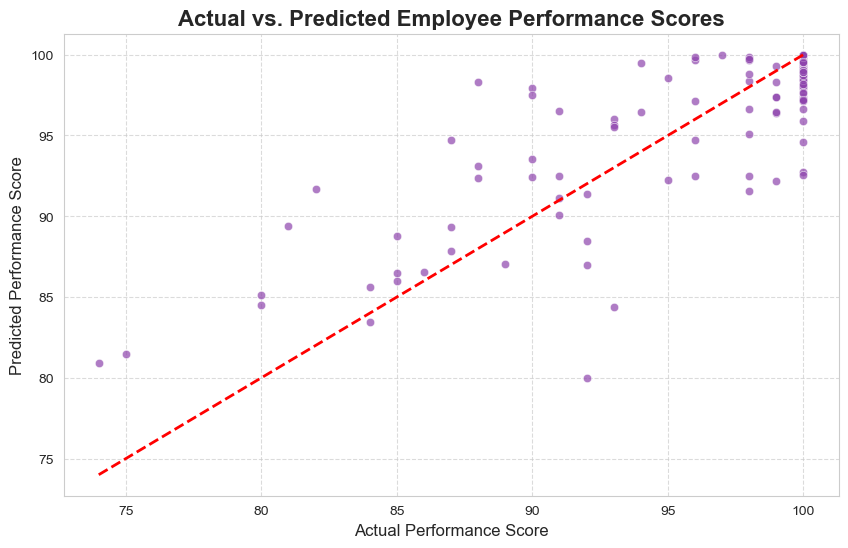


--- Model Evaluation Complete ---


In [221]:
# --- 4. Model Building & Training ---
print("\n--- Starting Model Building & Training ---")

# Choose a Machine Learning Model: RandomForestRegressor
# RandomForest is robust and generally performs well, suitable for regression tasks.
# n_estimators: number of trees in the forest
# random_state: for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores

# Train the model using the scaled training data
model.fit(X_train_scaled, y_train)

print("\n--- Model Training Complete ---")

# --- 5. Model Evaluation ---
print("\n--- Starting Model Evaluation ---")

# Make predictions on the scaled test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Visualize actual vs. predicted performance scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='#8e44ad') # A professional purple color
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Diagonal line for perfect prediction
plt.title('Actual vs. Predicted Employee Performance Scores', fontsize=16, fontweight='bold')
plt.xlabel('Actual Performance Score', fontsize=12)
plt.ylabel('Predicted Performance Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

print("\n--- Model Evaluation Complete ---")

In [ ]:
# --- 6. Feature Importance ---
print("\n--- Analyzing Feature Importance ---")

# Get feature importances from the trained model
feature_importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort features by importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("\nTop 10 Important Features:")
# Calculate max feature name length for consistent spacing
max_feature_len = max(len(feature) for feature in importance_df.head(10)['Feature'])

# Iterate and print with numerical order and formatted spacing
for i, row in enumerate(importance_df.head(10).itertuples()):
    # Use f-string formatting with dynamic padding for the feature name and fixed padding for the importance
    print(f"{i+1:<3} {row.Feature:<{max_feature_len}}    {row.Importance:.6f}") # Increased precision to .6f for example values

# Visualize feature importances
plt.figure(figsize=(12, 7))
# Updated line to address FutureWarning: Passing `palette` without assigning `hue` is deprecated
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis', hue='Feature', legend=False)
plt.title('Top 10 Most Important Features for Performance Prediction', fontsize=16, fontweight='bold')
plt.xlabel('Importance (Relative)', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

print("\n--- Prediction Model Development Complete ---")
